# --------------------코랩에서만 돌아가는 코드!!!!!!!!!!!!--------------------------

## 1. 구글 드라이브 마운트

구글 드라이브를 마운트해야 구글 드라이브에 yolo 코드를 다운받고, 드라이브에 있는 데이터로 학습을 할 수 있음

In [45]:
from google.colab import drive
import os

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
%cd /content/drive

/content/drive


In [49]:
%pwd

'/content/drive'

In [50]:
# 작업 경로를 MyDrive로 변경하여 구글 드라이브에 접속 후 바로 작업 디렉토리를 확인 가능

print('현재 작업 경로 :', os.getcwd())
os.chdir('/content/drive/MyDrive')
print('변경된 작업 경로 :', os.getcwd())

현재 작업 경로 : /content/drive
변경된 작업 경로 : /content/drive/MyDrive


## 2. YOLOv5 레퍼지토리 다운로드
코드를 실행하면 구글 드라이브에 YOLO 코드가 다운로드
한 번만 다운로드하면 됨(구글 드라이브에 다운로드되니까)


In [ ]:
# 처음에 한번만 실행 !
!git clone https://github.com/ultralytics/yolov5  # YOLOv5 레퍼지토리 clone

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [51]:
# 필요한 패키지 다운로드 및 임포트
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import yaml
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

/content/drive/MyDrive/yolov5
Setup complete. Using torch 2.0.1+cu118 (Tesla T4)


## 3. 데이터셋 다운로드, yaml 파일 수정 - 각자 진행
- 사용하고자 하는 커스텀 데이터셋을 구글 드라이브에 'dataset'이라는 폴더에 업로드
- 'dataset' 폴더 안에는 학습/평가 데이터와 어노테이션(라벨) 그리고 데이터셋에 대한 설명이 담긴 yaml파일 필요

- Roboflow의 퍼블릭 데이터셋 사용
  - [roboflow 퍼블릭 데이터셋](https://public.roboflow.com/object-detection)에서 사용하고 싶은 데이터셋 다운로드해서 해당 폴더에 업로드
  - 여러 포맷으로 다운로드할 수 있는데 그 중에서 TXT - YOLOv5 PyTorch 로 다운로드

- 그 외 커스텀 데이터셋 사용
  - 다른 데이터셋이나 본인이 만든 데이터셋을 사용하고 싶다면 데이터, 라벨, yaml 파일을 모두 퍼블릭 데이터셋의 규격에 맞게 통일해줘야됨 (물론 코드 수정이 가능하다면 데이터셋 로딩하는 코드를 수정해도 됨)

- yaml 파일 수정
  - train, val(또는 test) 데이터가 있는 경로 수정 필요




In [52]:
# 사용할 데이터셋 경로 및 데이터셋의 yaml 파일 경로 지정
data_dir = '/content/drive/MyDrive/Colab Notebooks/competition/test/yolotest/'
data_yaml = '/content/drive/MyDrive/Colab Notebooks/competition/test/yolotest/data.yaml'

# ---------yaml파일안에 names 부분에 캡슐코드가 들어가야하고 아래 내가 넣은 이름들은 그냥 대충 넣어둔것,  nc가 의미하는것은 name갯수

In [53]:
# 데이터셋 yaml 파일 확인
with open(data_yaml) as f:
    film = yaml.load(f, Loader=yaml.FullLoader)
    display(film)

{'names': ['Epinare',
  'tiafran',
  'biometics capsule',
  'bacilliformis capsule',
  'Kratin20mg',
  'Kratin10mg',
  'Kratin5mg',
  'Lacto NQ Capsule',
  'Anagra capsules0.5mg',
  'MuCo One Capsule',
  'Ldomin Capsule300mg',
  'biwoomi500mg',
  'Endomin 300 Premium Soft Capsule 300mg',
  'eldose in capsule',
  'Ranofensemi',
  'New Erdote Capsule',
  'Refrega Capsules75mg',
  'reselton capsule6.0mg',
  'Bearrotan50mg',
  'Beatus',
  'Phytarotene2mg',
  'Rukio10mg',
  'ducarb5mg'],
 'nc': 22,
 'train': '/content/drive/MyDrive/Colab Notebooks/competition/test/yolotest/testlabel',
 'val': '/content/drive/MyDrive/Colab Notebooks/competition/test/yolotest/validlabel'}

In [ ]:
%pwd

UsageError: CWD no longer exists - please use %cd to change directory.


In [54]:
# yaml 파일의 train, val 데이터가 있는 경로 수정 (기존 경로 -> 구글 드라이브에 저장된 경로로)
film['train'] = '/content/drive/MyDrive/Colab Notebooks/competition/test/yolotest/testlabel'
film['val'] = '/content/drive/MyDrive/Colab Notebooks/competition/test/yolotest/validlabel'

with open(data_yaml, 'w') as f:
    yaml.dump(film, f)

print('변경된 yaml 파일 :')
with open(data_yaml) as f:
    film = yaml.load(f, Loader=yaml.FullLoader)
    display(film)

변경된 yaml 파일 :


{'names': ['Epinare',
  'tiafran',
  'biometics capsule',
  'bacilliformis capsule',
  'Kratin20mg',
  'Kratin10mg',
  'Kratin5mg',
  'Lacto NQ Capsule',
  'Anagra capsules0.5mg',
  'MuCo One Capsule',
  'Ldomin Capsule300mg',
  'biwoomi500mg',
  'Endomin 300 Premium Soft Capsule 300mg',
  'eldose in capsule',
  'Ranofensemi',
  'New Erdote Capsule',
  'Refrega Capsules75mg',
  'reselton capsule6.0mg',
  'Bearrotan50mg',
  'Beatus',
  'Phytarotene2mg',
  'Rukio10mg',
  'ducarb5mg'],
 'nc': 22,
 'train': '/content/drive/MyDrive/Colab Notebooks/competition/test/yolotest/testlabel',
 'val': '/content/drive/MyDrive/Colab Notebooks/competition/test/yolotest/validlabel'}

In [ ]:
data_yaml

'/content/drive/MyDrive/Colab Notebooks/competition/test/yolotest/data.yaml'

# 4. YOLOv5 모델 학습
- 배치사이즈, 학습 에폭, 모델 사이즈 등을 선택하여 학습시킬 수 있음
- 학습 결과 중 베스트 모델이 저장됨 -> 모델 저장된 경로 확인 필수!
  - img: 입력 이미지 크기
  - batch: 배치 사이즈
  - epochs: 총 학습 에폭
  - data: 데이터셋 yaml 파일 경로
  - weights: 모델 웨이트 경로(pre-train된 모델로 학습시키기 때문에)
  - cache: 캐시 이미지

In [56]:
%cd /content/drive/MyDrive/Colab Notebooks/competition/test/yolotest/

/content/drive/MyDrive/Colab Notebooks/competition/test/yolotest


In [64]:
import cv2
from google.colab.patches import cv2_imshow

In [65]:
image = cv2.imread('./testlabel/K-038884_0_0_0_0_75_000_200.png')

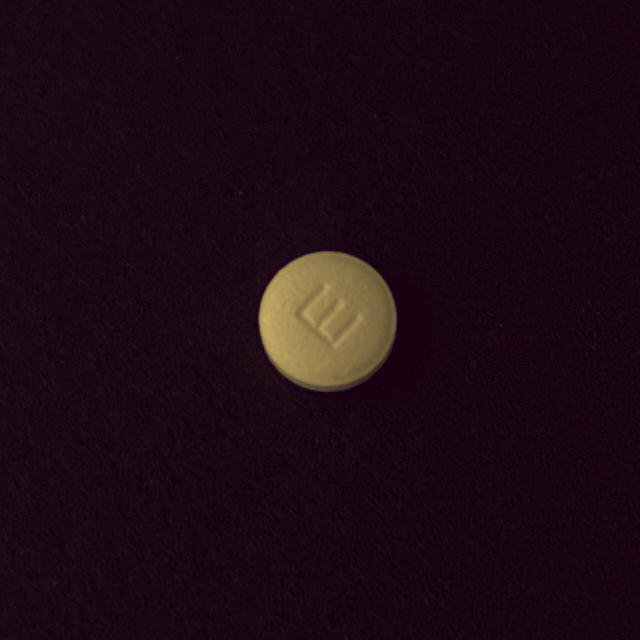

In [67]:
cv2_imshow(image)

In [ ]:
a = cv2.imread("")

In [73]:
%cd ../../../../yolov5

/content/drive/MyDrive/yolov5


#여기서 아래 쓰여진 코드에 원래는 변수에 절대경로 넣어서 대입하는 방식이였는데 그게 안돌아가서 직접 코드에 절대경로 넣어서 돌린거기때문에 쓰는사람에따라서 경로 변경해서 진행시켜주면 됨.

In [74]:
!python train.py --img 640 --batch 8 --epochs 50 --data '/content/drive/MyDrive/Colab Notebooks/competition/test/yolotest/data.yaml' --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=, data=/content/drive/MyDrive/Colab Notebooks/competition/test/yolotest/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 2 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5 🚀 v7.0-185-g2334aa7 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, bo

# 5. 텐서보드 시작하기
텐서보드는 학습시키는 딥러닝 모델이 잘 학습되는지 시각적으로 확인할 수 있는 어플리케이션이라보 보시면 좋을 것 같습니다.

In [ ]:
# Start tensorboard
# Launch after you have started training
# logs save in the folder "runs"
%load_ext tensorboard
%tensorboard --logdir runs

# 6. 학습한 모델 테스트

In [ ]:
# 테스트 이미지 경로
test_data_dir = film['val']

# 실험 번호 지정 - 진행한 실험이 저장된 경로 확인해서 기입! - runs/train/exp1 인지 exp2, exp3 인지 확인 후 아래 번호 지정
train_exp_num = 11

# 여기도 절대경로 넣어주면되고 img는 resize할 값을 설정 (클수록 성능은 좋으나 느림), conf값은 threadhold 값을 의미 0.5퍼 미만일땐 네모박스를 안그림. sorce값은 내가 학습시킨 best모델을 어떤 이미지를 넣어서 확인할지 하는 확인용 이미지가 들어가있는 폴더경로기입

In [ ]:
!python detect.py --weights '/content/drive/MyDrive/yolov5/runs/train/exp{train_exp_num}/weights/best.pt' --img 640 --conf 0.5 --source '/content/drive/MyDrive/Colab Notebooks/competition/test/yolotest/validlabel'

detect: weights=['/content/drive/MyDrive/yolov5/runs/train/exp11/weights/best.pt'], source=/content/drive/MyDrive/Colab Notebooks/competition/test/yolotest/validlabel, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-185-g2334aa7 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7072156 parameters, 0 gradients, 15.9 GFLOPs
image 1/220 /content/drive/MyDrive/Colab Notebooks/competition/test/yolotest/validlabel/K-038884_0_0_0_1_75_280_200.png: 640x512 1 Epinare, 45.4ms
image 2/220 /content/drive/MyDrive/Colab Notebooks/competition/test/yolotest/validlabel/K-038884_0_0_0_1_75_300_

# 아래코드는 실행이 안되는거같고 자른거 확인해 보려면 학습 끝낸 로그창 가장 아래에 어느 폴더에 저장되는지 들어가서 확인할 수 있음

In [ ]:
# 테스트 결과 확인해보기

import glob
from IPython.display import Image, display

test_exp_num = 2

# if not os.path.exists('/content/drive/MyDrive/yolov5/runs/detect/exp' + str(test_exp_num) + '/') :
if not os.path.exists('/content/drive/MyDrive/yolov5/runs/detect/exp/') :
  raise Exception('test_exp_num 을 다시 확인하세요.')

# for imageName in glob.glob('/content/drive/MyDrive/yolov5/runs/detect/exp' + str(test_exp_num) + '/*.jpg'): #assuming JPG
for imageName in glob.glob('/content/drive/MyDrive/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

## 7. 학습한 베스트 모델 저장

In [ ]:
# 학습한 베스트 모델 저장
from google.colab import files
files.download('./runs/train/exp' + str(test_exp_num) + '/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>